In [776]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [777]:
df_contacts = pd.read_csv('contacts.csv')
df_listings = pd.read_csv('listings.csv')
df_users = pd.read_csv('users.csv')

In [778]:
df_contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


In [779]:
df_contacts.dtypes

id_guest_anon                            object
id_host_anon                             object
id_listing_anon                          object
ts_interaction_first                     object
ts_reply_at_first                        object
ts_accepted_at_first                     object
ts_booking_at                            object
ds_checkin_first                         object
ds_checkout_first                        object
m_guests                                float64
m_interactions                            int64
m_first_message_length_in_characters    float64
contact_channel_first                    object
guest_user_stage_first                   object
dtype: object

In [780]:
df_contacts.iloc[:, 3:9] = df_contacts.iloc[:, 3:9].apply(pd.to_datetime, errors='coerce', 
                                                          infer_datetime_format = True)

In [781]:
df_contacts.dtypes

id_guest_anon                                   object
id_host_anon                                    object
id_listing_anon                                 object
ts_interaction_first                    datetime64[ns]
ts_reply_at_first                       datetime64[ns]
ts_accepted_at_first                    datetime64[ns]
ts_booking_at                           datetime64[ns]
ds_checkin_first                        datetime64[ns]
ds_checkout_first                       datetime64[ns]
m_guests                                       float64
m_interactions                                   int64
m_first_message_length_in_characters           float64
contact_channel_first                           object
guest_user_stage_first                          object
dtype: object

In [782]:
df_contacts.shape

(27887, 14)

In [783]:
df_contacts.isnull().sum() 
#seems like there are no nulls because of any data quality issue except one row where m_guests is null

id_guest_anon                               0
id_host_anon                                0
id_listing_anon                             0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel_first                       0
guest_user_stage_first                      0
dtype: int64

In [784]:
df_contacts[df_contacts['m_guests'].isnull()]

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
24738,abc1b137-28b0-4337-a93c-ed77c16f49d8,1a260779-97eb-4c3f-a020-c09a094033a4,f4ada617-3298-4c78-97ee-104edd981e09,2016-01-11 12:08:54,2016-01-12 17:48:59,NaT,NaT,2016-01-22,2016-01-25,NaN,3,134.0,contact_me,past_booker


In [785]:
#let us check if there are other inquiries by the same guest
df_contacts[df_contacts['id_guest_anon'] == 'abc1b137-28b0-4337-a93c-ed77c16f49d8']

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
24738,abc1b137-28b0-4337-a93c-ed77c16f49d8,1a260779-97eb-4c3f-a020-c09a094033a4,f4ada617-3298-4c78-97ee-104edd981e09,2016-01-11 12:08:54,2016-01-12 17:48:59,NaT,NaT,2016-01-22,2016-01-25,NaN,3,134.0,contact_me,past_booker


In [786]:
np.max(df_contacts['ts_interaction_first'])

Timestamp('2016-06-30 23:58:14')

In [787]:
np.min(df_contacts['ts_interaction_first'])
#data from Jan-Jun of 2016 is given to us

Timestamp('2016-01-01 00:46:47')

In [788]:
np.max(df_contacts['ds_checkin_first'])

Timestamp('2018-05-01 00:00:00')

In [789]:
np.min(df_contacts['ds_checkin_first'])

Timestamp('2016-01-01 00:00:00')

In [790]:
#let's get columns for checking if month, day of the moth or day of the week has any correlation with bookings or dropoffs
df_contacts['checkin_month'] = df_contacts['ds_checkin_first'].dt.month
df_contacts['checkin_day'] = df_contacts['ds_checkin_first'].dt.day
df_contacts['checkin_day_of_week'] = df_contacts['ds_checkin_first'].dt.dayofweek

In [791]:
df_bookings = df_contacts[df_contacts.ts_booking_at.notnull()]
df_bookings.shape

(11587, 17)

In [792]:
df_dropoffs = df_contacts[df_contacts.ts_booking_at.isnull()]
df_dropoffs.shape

(16300, 17)

In [793]:
df_dropoffs.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,checkin_month,checkin_day,checkin_day_of_week
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,8,11,3
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,3,14,0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40,2016-05-05 15:17:40,NaT,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new,5,27,4
5,25940fca-7aa9-480d-9cf0-56cc1136d30c,90334ef3-f489-45a0-89e0-d18d370e4a1c,5dd24057-774c-45b3-b305-ebf664246952,2016-04-19 07:08:21,2016-04-19 11:32:23,NaT,NaT,2016-04-26,2016-05-01,1.0,7,348.0,contact_me,new,4,26,1
6,ee6633e1-96de-47f6-96e7-d962fc6db7dd,10dc3fc4-694f-44b2-aaac-9dbace0ebabd,259d4a6c-dcda-4ff2-85cb-2882f6801b3a,2016-05-30 15:16:21,2016-05-30 15:18:55,2016-06-01 23:38:20,NaT,2016-08-06,2016-08-14,6.0,7,29.0,contact_me,past_booker,8,6,5


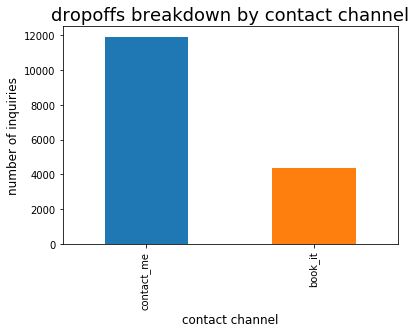

In [794]:
df_dropoffs['contact_channel_first'].value_counts().plot(kind = 'bar')

plt.title('dropoffs breakdown by contact channel', fontsize = 18)
plt.ylabel('number of inquiries', fontsize = 12)
plt.xlabel('contact channel', fontsize = 12)

plt.show()

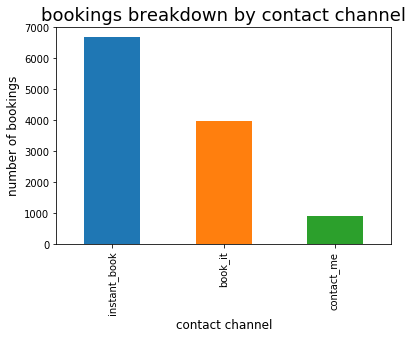

In [795]:
df_bookings['contact_channel_first'].value_counts().plot(kind = 'bar')

plt.title('bookings breakdown by contact channel', fontsize = 18)
plt.ylabel('number of bookings', fontsize = 12)
plt.xlabel('contact channel', fontsize = 12)

plt.show()

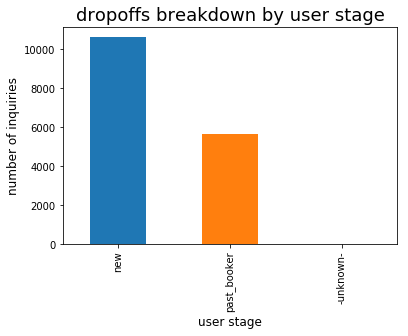

In [796]:
df_dropoffs['guest_user_stage_first'].value_counts().plot(kind = 'bar')

plt.title('dropoffs breakdown by user stage', fontsize = 18)
plt.ylabel('number of inquiries', fontsize = 12)
plt.xlabel('user stage', fontsize = 12)

plt.show()

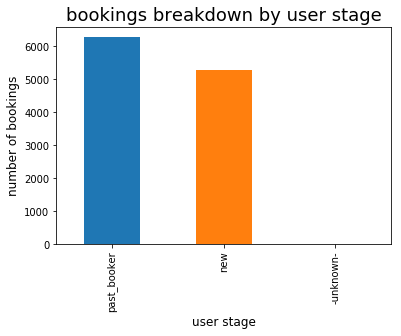

In [797]:
df_bookings['guest_user_stage_first'].value_counts().plot(kind = 'bar')

plt.title('bookings breakdown by user stage', fontsize = 18)
plt.ylabel('number of bookings', fontsize = 12)
plt.xlabel('user stage', fontsize = 12)

plt.show()

In [798]:
df_dropoffs.describe().round(2)

,m_guests,m_interactions,m_first_message_length_in_characters,checkin_month,checkin_day,checkin_day_of_week
count,16299.00,16300.00,16300.00,16300.00,16300.00,16300.00
mean,2.98,4.77,210.16,5.63,11.92,3.36
std,2.04,5.45,184.03,2.93,8.17,1.74
min,0.00,1.00,0.00,1.00,1.00,0.00
25%,2.00,2.00,88.00,2.00,5.00,2.00
50%,2.00,3.00,166.00,7.00,10.00,4.00
75%,4.00,5.00,281.00,8.00,18.00,5.00
max,16.00,153.00,1948.00,12.00,31.00,6.00


In [799]:
df_bookings.describe().round(2)

,m_guests,m_interactions,m_first_message_length_in_characters,checkin_month,checkin_day,checkin_day_of_week
count,11587.00,11587.00,11587.00,11587.00,11587.00,11587.00
mean,2.50,13.16,170.58,5.21,14.42,3.20
std,1.54,12.63,179.44,2.52,8.33,1.81
min,0.00,2.00,0.00,1.00,1.00,0.00
25%,2.00,6.00,21.00,3.00,7.00,2.00
50%,2.00,10.00,135.00,5.00,13.00,3.00
75%,3.00,17.00,249.00,8.00,21.00,5.00
max,16.00,410.00,2341.00,12.00,31.00,6.00


Average number of interactions are significantly higher for bookings as compared to dropoffs.

In [800]:
#let's analyze the time it took by host to reply for both bookings and dropoffs
df_bookings['time_to_reply'] = df_bookings['ts_reply_at_first'] - df_bookings['ts_interaction_first']
df_dropoffs['time_to_reply'] = df_dropoffs['ts_reply_at_first'] - df_dropoffs['ts_interaction_first']

df_bookings['time_to_reply'] = pd.to_timedelta(df_bookings['time_to_reply'])
df_bookings.describe().round(2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,m_guests,m_interactions,m_first_message_length_in_characters,checkin_month,checkin_day,checkin_day_of_week,time_to_reply
count,11587.00,11587.00,11587.00,11587.00,11587.00,11587.00,11587
mean,2.50,13.16,170.58,5.21,14.42,3.20,0 days 02:54:12.034176
std,1.54,12.63,179.44,2.52,8.33,1.81,1 days 20:57:21.774354
min,0.00,2.00,0.00,1.00,1.00,0.00,-1 days +23:58:50
25%,2.00,6.00,21.00,3.00,7.00,2.00,0 days 00:00:00
50%,2.00,10.00,135.00,5.00,13.00,3.00,0 days 00:01:46
75%,3.00,17.00,249.00,8.00,21.00,5.00,0 days 00:50:19.500000
max,16.00,410.00,2341.00,12.00,31.00,6.00,176 days 06:24:44


In [801]:
df_dropoffs.describe().round(2)

,m_guests,m_interactions,m_first_message_length_in_characters,checkin_month,checkin_day,checkin_day_of_week,time_to_reply
count,16299.00,16300.00,16300.00,16300.00,16300.00,16300.00,14268
mean,2.98,4.77,210.16,5.63,11.92,3.36,1 days 00:23:39.581090
std,2.04,5.45,184.03,2.93,8.17,1.74,7 days 16:55:17.545568
min,0.00,1.00,0.00,1.00,1.00,0.00,-1 days +23:58:50
25%,2.00,2.00,88.00,2.00,5.00,2.00,0 days 00:27:36
50%,2.00,3.00,166.00,7.00,10.00,4.00,0 days 03:14:53
75%,4.00,5.00,281.00,8.00,18.00,5.00,0 days 12:30:27
max,16.00,153.00,1948.00,12.00,31.00,6.00,410 days 02:55:54


In [846]:
df_contacts[df_contacts['ts_reply_at_first'] < df_contacts['ts_interaction_first']].head()
#there are inquiries with host reply time less than first interaction time

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,checkin_month,checkin_day,checkin_day_of_week
140,b837f39a-e192-471b-ab3a-d370c1665008,dfe70119-e9d3-445d-95f5-d69754bec411,92f077ff-889e-42e8-878a-9ee30977d200,2016-01-23 19:13:58,2016-01-23 19:12:48,2016-01-23 19:12:48,NaT,2016-02-03,2016-02-10,2.0,3,21.0,contact_me,past_booker,2,3,2
203,cb800910-3749-46c4-b3df-21e2995ccb4f,fcfb33b2-09cc-4256-89bf-46e01a34b29f,9a517c0f-076c-4f4c-adce-4b4441ce0c7e,2016-01-06 10:21:49,2016-01-06 10:21:18,2016-01-06 10:21:18,2016-01-06 10:21:18,2016-01-22,2016-01-25,4.0,9,249.0,book_it,past_booker,1,22,4
286,4f3415a7-73bd-49dc-9b45-5bada2a11196,08dd61b8-6839-4713-90c3-1618df9bbd7e,844e4aa1-fd95-4c85-ad50-849f785962b0,2016-04-25 21:41:51,2016-04-25 21:41:32,NaT,NaT,2016-12-29,2017-01-04,5.0,3,564.0,contact_me,new,12,29,3
295,51dc9eaf-f84b-48f5-bbf2-16d891cff8b0,ab124900-a516-4901-9699-692f94aeb6d8,5315d1f7-5f1d-4b10-98be-dc0105776eaf,2016-03-07 15:06:15,2016-03-07 15:05:05,NaT,NaT,2016-03-19,2016-03-24,2.0,8,202.0,contact_me,past_booker,3,19,5
378,a13c1750-57d7-41fe-88e3-674128b52108,261917c5-0378-4a79-bce6-de34ce54034a,0368b67f-9777-4e82-a96d-47e3c46ab6d9,2016-03-30 15:57:46,2016-03-30 15:56:36,2016-03-30 15:56:36,NaT,2016-05-25,2016-05-29,2.0,1,12.0,contact_me,new,5,25,2


In [803]:
df_bookings[df_bookings['ts_reply_at_first'] >= df_bookings['ts_interaction_first']]['time_to_reply'].describe()

count                     11426
mean     0 days 02:56:39.862681
std      1 days 21:16:13.288834
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:02:13
75%      0 days 00:52:32.500000
max           176 days 06:24:44
Name: time_to_reply, dtype: object

In [804]:
df_dropoffs[df_dropoffs['ts_reply_at_first'] >= df_dropoffs['ts_interaction_first']]['time_to_reply'].describe()

count                     13977
mean     1 days 00:54:08.993203
std      7 days 18:48:10.426007
min             0 days 00:00:00
25%             0 days 00:32:10
50%             0 days 03:27:43
75%             0 days 12:47:04
max           410 days 02:55:54
Name: time_to_reply, dtype: object

Clearly, reply time does play a role in whether the inquiry would be converted in a booking as we can see that average reply time and it's standard deviation for bookings is considerably less than dropoffs.

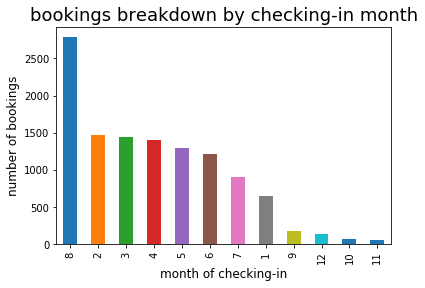

In [805]:
#let's now check if there are any specific months, days of month or day of the week causing major bookings and dropoffs.
df_bookings['checkin_month'].value_counts()[:50].plot(kind = 'bar')

plt.title('bookings breakdown by checking-in month', fontsize = 18)
plt.ylabel('number of bookings', fontsize = 12)
plt.xlabel('month of checking-in', fontsize = 12)

plt.show()

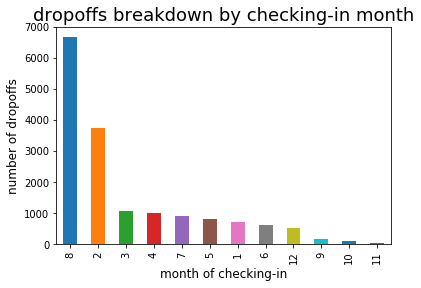

In [806]:
df_dropoffs['checkin_month'].value_counts()[:50].plot(kind = 'bar')

plt.title('dropoffs breakdown by checking-in month', fontsize = 18)
plt.ylabel('number of dropoffs', fontsize = 12)
plt.xlabel('month of checking-in', fontsize = 12)

plt.show()
#Aug and feb are the months with highest traffic dropping off. 
#Perhaps try and increase the lisitings especially in these months?

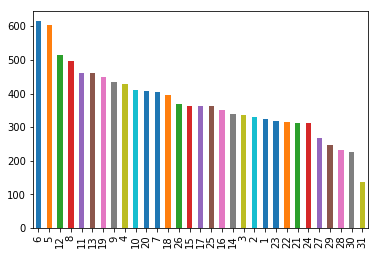

In [807]:
df_bookings['checkin_day'].value_counts()[:50].plot(kind = 'bar')
plt.show()

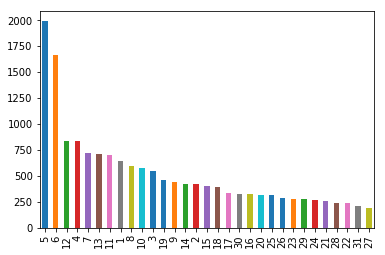

In [808]:
df_dropoffs['checkin_day'].value_counts()[:50].plot(kind = 'bar')
plt.show()

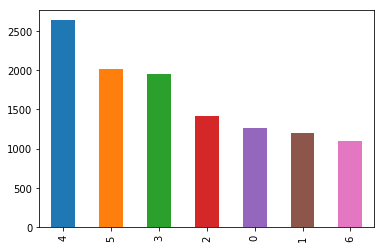

In [809]:
df_bookings['checkin_day_of_week'].value_counts()[:50].plot(kind = 'bar')
plt.show()

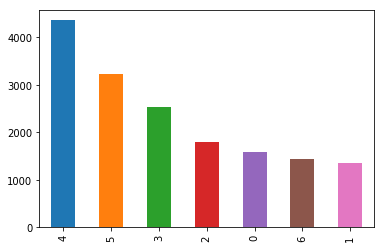

In [810]:
df_dropoffs['checkin_day_of_week'].value_counts()[:50].plot(kind = 'bar')
plt.show()

In [811]:
#lets merge other tables and see if we can pick anything significant from other tables
df_users.columns = ('id_guest_anon', 'country', 'words_in_user_profile')
df_users.shape

(31525, 3)

In [812]:
df_contacts.shape

(27887, 17)

In [813]:
df_user_contact = pd.merge(df_contacts, df_users, on= 'id_guest_anon', how='left')
df_user_contact.shape

(27979, 19)

In [814]:
df_merge = pd.merge(df_user_contact, df_listings, on= 'id_listing_anon', how='left')
df_merge.shape

(27979, 22)

In [815]:
df_merge.sort_values('ts_interaction_first').head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,contact_channel_first,guest_user_stage_first,checkin_month,checkin_day,checkin_day_of_week,country,words_in_user_profile,room_type,listing_neighborhood,total_reviews
10483,dbf3b26c-92c0-41b4-adf4-64f181cb50eb,c6b86046-1fe3-4bfc-a670-4b34cc621f19,4451463b-2929-4d3e-a398-eda0d06cdab2,2016-01-01 00:46:47,2016-01-01 01:07:50,NaT,NaT,2016-02-07,2016-02-09,4.0,...,book_it,past_booker,2,7,6,FR,0,Entire home/apt,Humaitá,1.0
6277,2075cf7e-1aff-49ee-9a2d-b2803974892d,76fcce99-d912-4301-9b5d-c8d9d3122d10,b0b282e9-5c09-42a6-bc36-edba8766ff0e,2016-01-01 01:15:04,NaT,NaT,NaT,2016-08-12,2016-08-15,4.0,...,contact_me,new,8,12,4,BR,0,Entire home/apt,-unknown-,0.0
3778,691e474e-72ff-4063-832c-29ef50c2d02f,49ec042b-01fe-49c1-8e7e-6ba8cffbaff3,bd7cd3a0-057d-469f-8060-7368b1e91e7a,2016-01-01 03:11:41,2016-01-01 03:58:13,NaT,NaT,2016-01-03,2016-01-04,2.0,...,book_it,new,1,3,6,AR,72,Entire home/apt,Botafogo,0.0
26909,6e6db741-8e17-4004-b4f6-03db5583fa36,d516950c-c41b-4707-bb47-1617aa81ce1a,ebd9a5ce-c045-4ea2-bff4-b08be15e980c,2016-01-01 05:14:48,2016-01-01 12:56:18,NaT,NaT,2016-02-04,2016-02-11,1.0,...,contact_me,new,2,4,3,BR,0,Entire home/apt,Copacabana,2.0
23821,58e229f4-2e06-40f0-9710-ace655f87def,3a9857eb-9072-4ffc-b841-8b499bb34a25,d6c6757d-5e82-4c62-ae7d-a31fa3521f2a,2016-01-01 06:28:35,2016-01-01 14:19:57,2016-01-01 14:19:57,2016-01-01 14:19:57,2016-08-02,2016-08-13,4.0,...,book_it,past_booker,8,2,1,US,0,Entire home/apt,Maracanã,0.0


In [816]:
df_merge_bookings = df_merge[df_merge['ts_booking_at'].notnull()]
df_merge_dropoffs = df_merge[df_merge['ts_booking_at'].isnull()]

In [817]:
df_merge_bookings.shape

(11608, 22)

In [818]:
df_merge_dropoffs.shape

(16371, 22)

In [819]:
df_merge_bookings.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,contact_channel_first,guest_user_stage_first,checkin_month,checkin_day,checkin_day_of_week,country,words_in_user_profile,room_type,listing_neighborhood,total_reviews
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,...,book_it,past_booker,8,2,1,CL,0,Entire home/apt,Copacabana,9.0
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25,2016-06-23 03:09:26,2016-06-23 03:09:33,2016-06-23 03:09:33,2016-08-19,2016-08-21,3.0,...,instant_book,past_booker,8,19,4,BR,1,Entire home/apt,Ipanema,1.0
7,b3357bab-cf20-4646-b723-23ae84fc8fb3,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-03-10 12:13:46,2016-03-10 12:13:47,2016-03-10 12:13:47,2016-03-10 12:13:47,2017-02-23,2017-03-02,1.0,...,instant_book,new,2,23,3,AT,185,Private room,-unknown-,39.0
8,e52ccc38-1ca1-48b4-a10a-08663601dbbb,1c990fca-5b09-4eca-bdcf-d9e923112f04,f6822854-6d3c-4cfd-a983-49603a401771,2016-04-24 06:46:42,2016-04-24 06:46:42,2016-04-24 06:46:42,2016-04-24 06:46:42,2016-05-16,2016-05-18,1.0,...,instant_book,past_booker,5,16,0,NL,1,Private room,-unknown-,40.0
12,a2c8d522-41df-4b49-9aaf-6c4b3d95afed,3d046d4c-b456-4fdc-b1db-9ee1a7a441a9,96169363-f4e6-4a15-8a2f-90d93c6ae469,2016-02-20 03:51:52,2016-02-20 09:57:20,2016-02-20 09:57:20,2016-02-20 09:57:20,2016-02-20,2016-02-21,2.0,...,book_it,past_booker,2,20,5,US,45,Entire home/apt,Ipanema,4.0


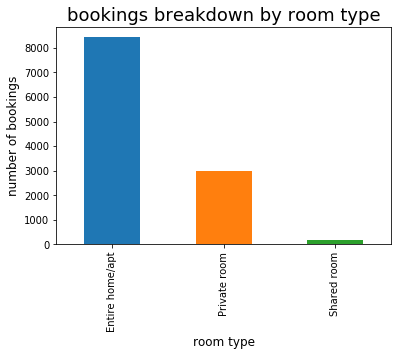

In [820]:
df_merge_bookings['room_type'].value_counts().plot(kind = 'bar')

plt.title('bookings breakdown by room type', fontsize = 18)
plt.ylabel('number of bookings', fontsize = 12)
plt.xlabel('room type', fontsize = 12)

plt.show()

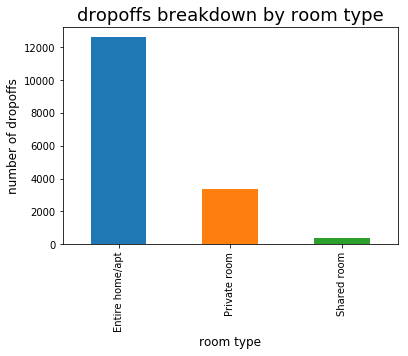

In [821]:
df_merge_dropoffs['room_type'].value_counts().plot(kind = 'bar')

plt.title('dropoffs breakdown by room type', fontsize = 18)
plt.ylabel('number of dropoffs', fontsize = 12)
plt.xlabel('room type', fontsize = 12)

plt.show()

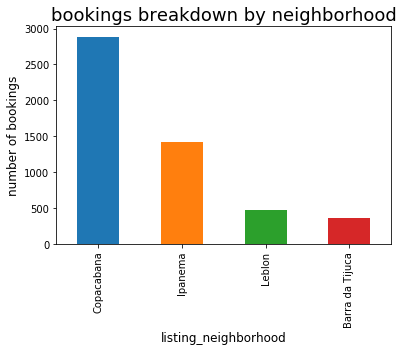

In [822]:
df_merge_bookings['listing_neighborhood'].value_counts()[1:5].plot(kind = 'bar')

plt.title('bookings breakdown by neighborhood', fontsize = 18)
plt.ylabel('number of bookings', fontsize = 12)
plt.xlabel('listing_neighborhood', fontsize = 12)

plt.show()

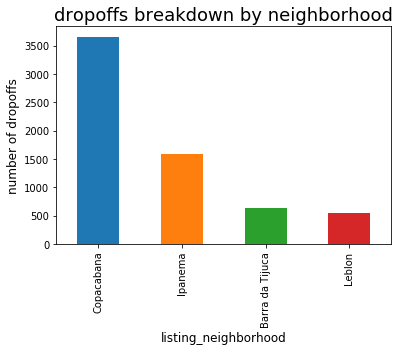

In [823]:
df_merge_dropoffs['listing_neighborhood'].value_counts()[1:5].plot(kind = 'bar')

plt.title('dropoffs breakdown by neighborhood', fontsize = 18)
plt.ylabel('number of dropoffs', fontsize = 12)
plt.xlabel('listing_neighborhood', fontsize = 12)

plt.show()

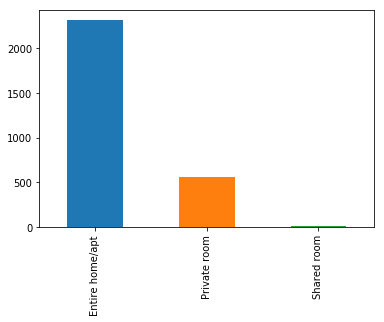

In [824]:
df_merge_bookings[df_merge_bookings['listing_neighborhood'] == 'Copacabana']['room_type'].value_counts().plot(kind = 'bar')

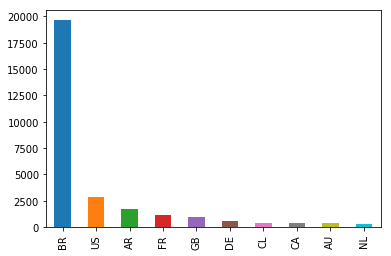

In [825]:
#total users
df_users['country'].value_counts()[:10].plot(kind = 'bar')

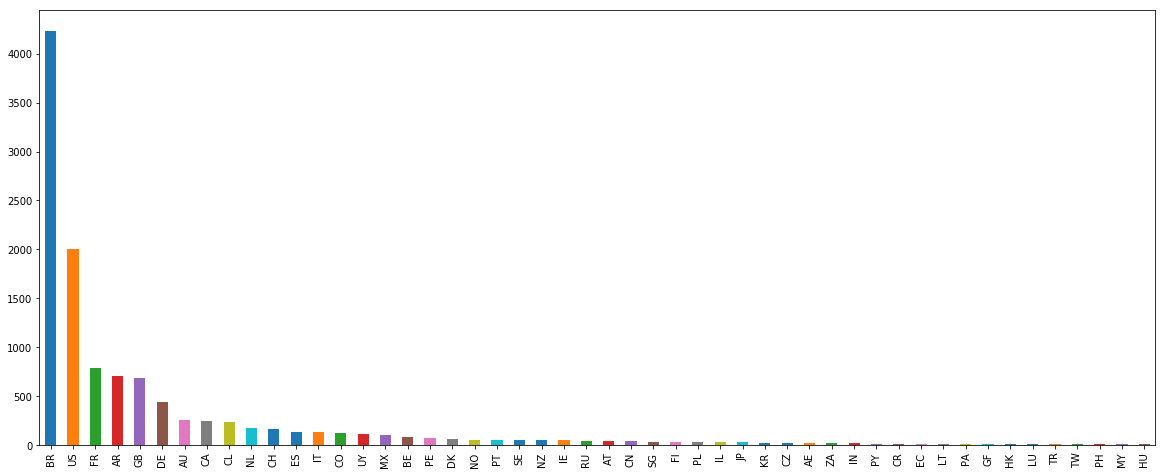

In [826]:
plt.figure(figsize= (20,8))
df_merge_bookings['country'].value_counts()[:50].plot(kind = 'bar')

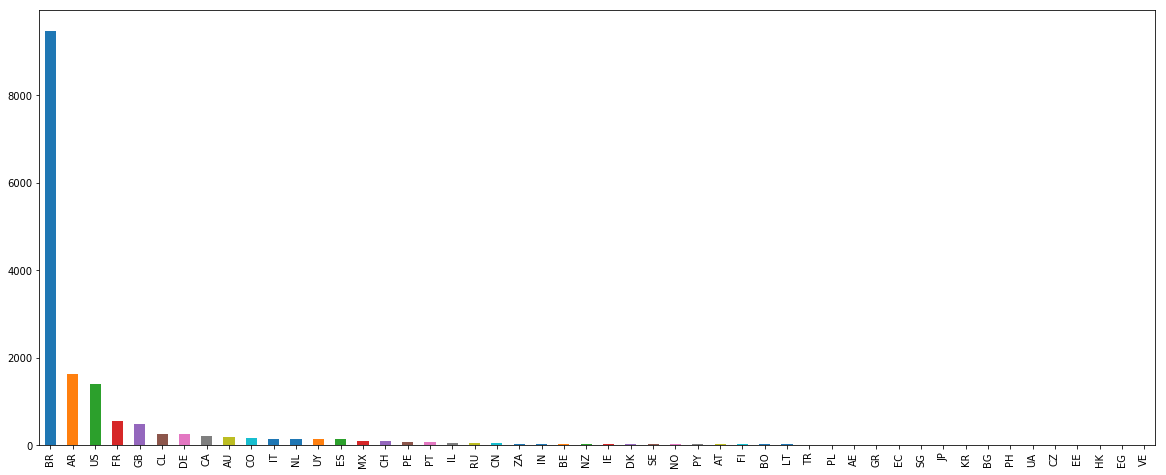

In [827]:
plt.figure(figsize= (20,8))

df_merge_dropoffs['country'].value_counts()[:50].plot(kind = 'bar')

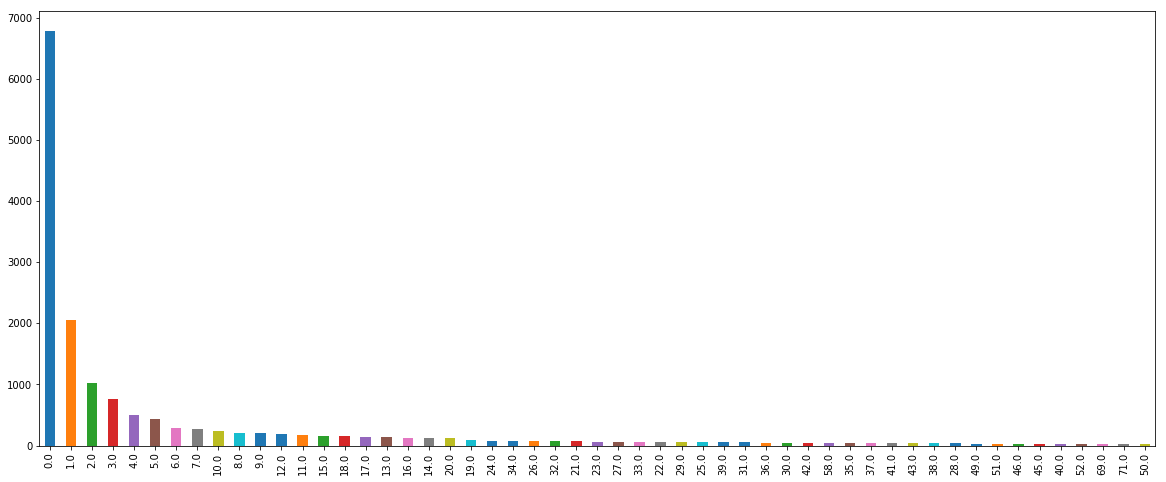

In [828]:
plt.figure(figsize= (20,8))

df_merge_dropoffs['total_reviews'].value_counts()[:50].plot(kind = 'bar')

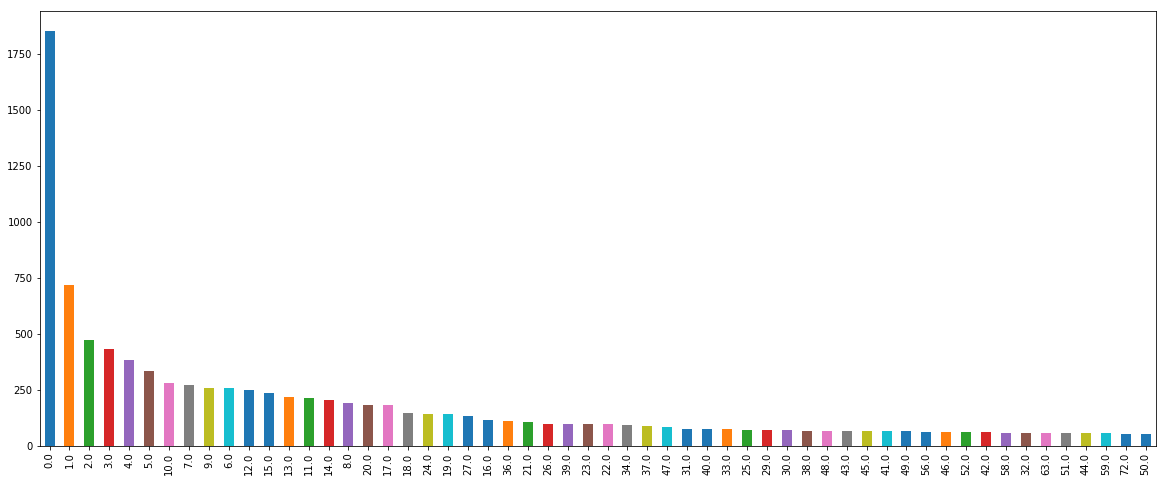

In [829]:
plt.figure(figsize= (20,8))

df_merge_bookings['total_reviews'].value_counts()[:50].plot(kind = 'bar')

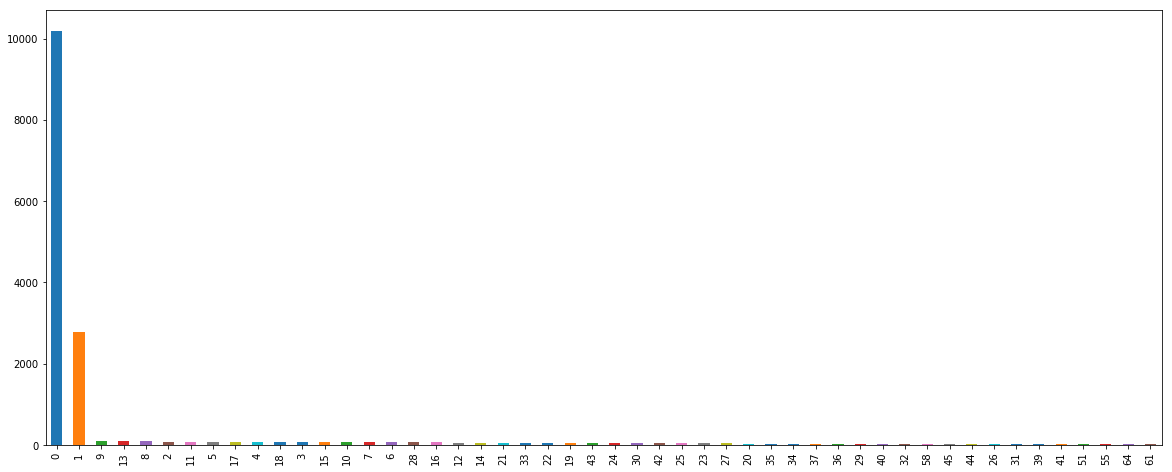

In [830]:
plt.figure(figsize= (20,8))

df_merge_dropoffs['words_in_user_profile'].value_counts()[:50].plot(kind = 'bar')

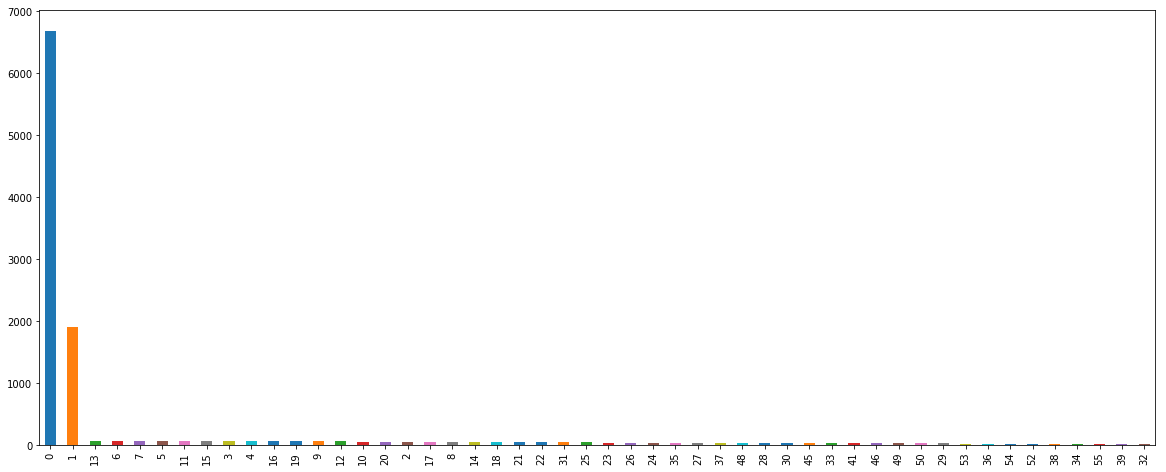

In [831]:
plt.figure(figsize= (20,8))

df_merge_bookings['words_in_user_profile'].value_counts()[:50].plot(kind = 'bar')

In [832]:
df_merge_bookings.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first', 'checkin_month',
       'checkin_day', 'checkin_day_of_week', 'country',
       'words_in_user_profile', 'room_type', 'listing_neighborhood',
       'total_reviews'],
      dtype='object')

In [833]:
df_host_rejected_dropoffs = df_merge_dropoffs[df_merge_dropoffs.ts_accepted_at_first.isnull()]
df_host_rejected_dropoffs.shape

(11525, 22)

In [834]:
df_host_didnt_reply = df_merge_dropoffs[df_merge_dropoffs.ts_reply_at_first.isnull()]
df_host_didnt_reply.shape

(2044, 22)

In [835]:
df_merge_dropoffs.shape

(16371, 22)

In [836]:
df_host_rejected_dropoffs.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,contact_channel_first,guest_user_stage_first,checkin_month,checkin_day,checkin_day_of_week,country,words_in_user_profile,room_type,listing_neighborhood,total_reviews
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,...,contact_me,past_booker,8,11,3,FR,0,Entire home/apt,Copacabana,0.0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,...,contact_me,new,3,14,0,AR,0,Private room,Vidigal,49.0
5,25940fca-7aa9-480d-9cf0-56cc1136d30c,90334ef3-f489-45a0-89e0-d18d370e4a1c,5dd24057-774c-45b3-b305-ebf664246952,2016-04-19 07:08:21,2016-04-19 11:32:23,NaT,NaT,2016-04-26,2016-05-01,1.0,...,contact_me,new,4,26,1,BR,0,Entire home/apt,Copacabana,0.0
9,177cddfa-fe47-4668-81bf-884490a6707b,2bd81140-3d71-4fd9-add3-5998f9263c57,cff02e60-1205-42fa-afd4-0c23029ce32e,2016-04-26 02:11:47,2016-04-26 02:16:39,NaT,NaT,2016-08-12,2016-08-17,4.0,...,book_it,new,8,12,4,US,50,Entire home/apt,-unknown-,3.0
10,8cb51614-2851-4d3d-93a6-620556ace3de,7a7c50a7-2a19-44a7-ab5c-b2b658ebcf8b,472ead4a-63a3-422e-8c98-1745f773e2c0,2016-01-10 18:09:45,2016-01-11 15:19:22,NaT,NaT,2016-02-06,2016-02-09,4.0,...,contact_me,new,2,6,5,BR,0,Entire home/apt,Leme,3.0


In [837]:
df_host_rejected_dropoffs['contact_channel_first'].value_counts()

contact_me    7392
book_it       4133
Name: contact_channel_first, dtype: int64

In [838]:
df_host_rejected_dropoffs['guest_user_stage_first'].value_counts()

new            7299
past_booker    4209
-unknown-        17
Name: guest_user_stage_first, dtype: int64

In [839]:
df_host_rejected_dropoffs['checkin_month'].value_counts()

8     5118
2     2807
3      631
4      578
7      565
1      486
5      473
12     364
6      338
9       94
10      55
11      16
Name: checkin_month, dtype: int64

In [840]:
df_host_rejected_dropoffs['room_type'].value_counts()

Entire home/apt    8921
Private room       2337
Shared room         267
Name: room_type, dtype: int64

In [845]:
df_host_rejected_dropoffs['listing_neighborhood'].value_counts()[:5]

-unknown-          5476
Copacabana         2428
Ipanema            1152
Barra da Tijuca     434
Leblon              410
Name: listing_neighborhood, dtype: int64